In [1]:
from ultralytics import YOLO
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt

c:\Users\hoang\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [25]:
ocr = PaddleOCR(use_angle_cls=False, lang="en")

[2024/06/29 13:02:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\hoang/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\hoang/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [26]:
img_path = r"C:\Users\hoang\OneDrive\Desktop\test_hackcmc\7.jpg"
result = ocr.ocr(img_path, cls=False, det=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)


# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path)
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path=r'C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\assets\fonts\simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

[2024/06/29 13:02:44] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.2873501777648926
[2024/06/29 13:02:46] ppocr DEBUG: rec_res num  : 12, elapsed : 1.3348548412322998
[[[448.0, 22.0], [518.0, 16.0], [522.0, 67.0], [453.0, 73.0]], ('10k', 0.9705434441566467)]
[[[456.0, 70.0], [515.0, 70.0], [515.0, 105.0], [456.0, 105.0]], ('LYDA', 0.996618926525116)]
[[[463.0, 109.0], [508.0, 109.0], [508.0, 143.0], [463.0, 143.0]], ('3k', 0.9863700866699219)]
[[[587.0, 113.0], [648.0, 113.0], [648.0, 137.0], [587.0, 137.0]], ('BLANC', 0.995376467704773)]
[[[689.0, 113.0], [751.0, 113.0], [751.0, 141.0], [689.0, 141.0]], ('BLANC', 0.9946687817573547)]
[[[587.0, 181.0], [655.0, 181.0], [655.0, 213.0], [587.0, 213.0]], ('1664', 0.9936590790748596)]
[[[684.0, 184.0], [751.0, 178.0], [754.0, 210.0], [687.0, 216.0]], ('1664', 0.9939859509468079)]
[[[903.0, 393.0], [984.0, 393.0], [984.0, 414.0], [903.0, 414.0]], ('oegaarde', 0.911304771900177)]
[[[105.0, 730.0], [161.0, 730.0], [161.0, 745.0], [105.0, 745.0]

In [27]:
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [28]:
config = Cfg.load_config_from_name("vgg_transformer")

In [29]:
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [30]:
detector = Predictor(config)

Model weight C:\Users\hoang\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


'ĐẶNG TRUNG LÝ'

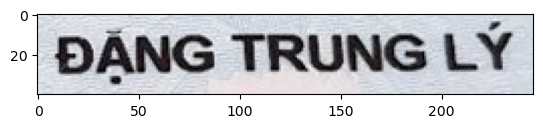

In [31]:
img = r'C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\assets\example_data\001063014772.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s